In [4]:
import numpy as np
import pandas as pd

In [5]:
df=pd.read_csv(r"D:\Data Science\MACHINE LEARNING\Assignment\Assignment-6 Machine Learning on Text\SMS Spam Collection Dataset\spam.csv",encoding =  'ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
df.shape

(5572, 5)

# Data Cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


##### Most of the values are null in the last 3 columns so dropping

In [8]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [9]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['target']=encoder.fit_transform(df['target'])

In [11]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


#### ham=0 and spam=1

In [12]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
#check for duplicates
df.duplicated().sum()

403

In [14]:
#remove duplicates
df=df.drop_duplicates(keep='first')

In [15]:
df.shape

(5169, 2)

# EDA

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

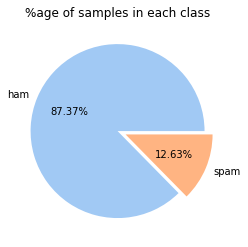

In [17]:
plt.title('%age of samples in each class')
plt.pie(df['target'].value_counts(),labels=['ham','spam'],colors=sns.color_palette('pastel'),explode=[0,0.1],autopct='%.2f%%')
plt.show()

#### Dataset is imbalanced

In [18]:
df['num_characters'] = df['text'].apply(len)
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [19]:
import spacy

nlp = spacy.load("en_core_web_sm")

def tokenize(x):
    doc=nlp(x)
    return len(doc)

In [20]:
df['num_words']=df['text'].apply(tokenize)

In [21]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,31
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [22]:
df['num_sents'] = df['text'].apply(lambda x: len(list(nlp(x).sents)))
df.head()

,target,text,num_characters,num_words,num_sents
0,0,"Go until jurong point, crazy.. Available only ...",111,24,3
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,31,4
3,0,U dun say so early hor... U c already then say...,49,13,2
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [23]:
df.describe()

,target,num_characters,num_words,num_sents
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.354808,2.493713
std,0.332253,58.236293,13.166777,1.858378
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,2.000000
75%,0.000000,117.000000,26.000000,3.000000
max,1.000000,910.000000,196.000000,32.000000


## Let's Analyse Ham and Spam separately

In [24]:
df.groupby('target').agg([np.mean,np.std,len,np.min,np.max])

num_characters                             num_words                   \
                 mean        std   len amin amax       mean        std   len   
target                                                                         
0           70.459256  56.358207  4516    2  910  16.940213  13.220340  4516   
1          137.891271  30.137753   653   13  224  28.137825   7.357188   653   

                 num_sents                            
       amin amax      mean       std   len amin amax  
target                                                
0         1  196  2.286315  1.764721  4516    1   32  
1         2   49  3.928025  1.857507   653    1   12

### We can clearly see the spam messages are larger in length

<AxesSubplot:title={'center':'Comparision between the classes'}, xlabel='target'>

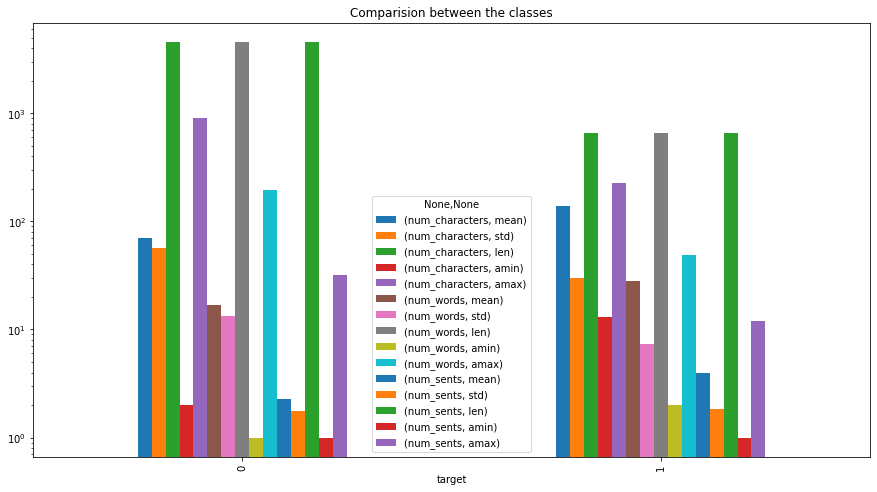

In [25]:
view=df.groupby('target').agg([np.mean,np.std,len,np.min,np.max])
view.plot(kind='bar',figsize=(15,8),title='Comparision between the classes',logy=True)

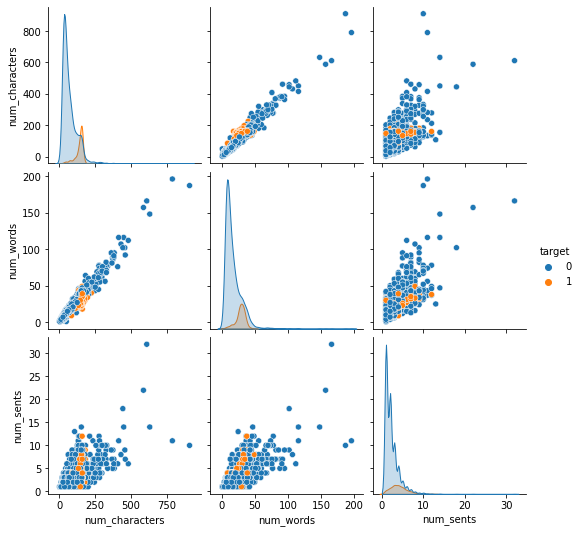

In [26]:
sns.pairplot(df,hue='target')

### Outliers present

# Data Preprocessing <br>
* Lower case
* Tokenization
* Removing special Characters
* Removing stop Words and punctuation
* Stemming/Lemmatization

In [27]:
from spacy.lang.en.stop_words import STOP_WORDS
import string
def transform_text(text):
    text = text.lower()
    text = [word.text for word in nlp(text)]
    y=[]
    for i in text:
        if i.isalnum() and (i not in STOP_WORDS) and (i not in string.punctuation):
            y.append(i)
    
    text=y[:]
    y.clear()
    for i in text:
        for j in nlp(i):
            y.append(j.lemma_)
    return " ".join(y)

In [29]:
df['transformed_text']=df['text'].apply(transform_text)

In [30]:
df.head()

,target,text,num_characters,num_words,num_sents,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,3,jurong point crazy available bugis n great wor...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,31,4,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,2,u dun early hor u c
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think go usf life


In [31]:
from collections import Counter
import matplotlib.pyplot as plt
spam_corpus= []
for msg in df[df['target']== 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


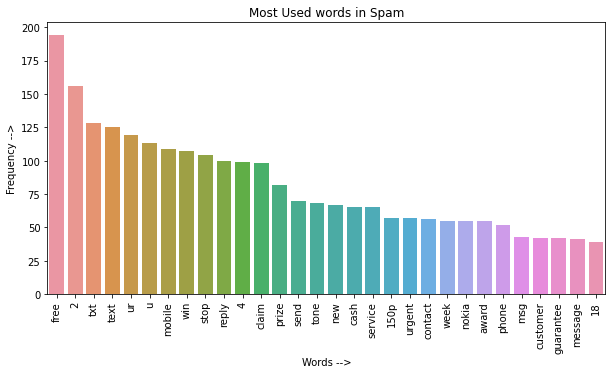

In [32]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(10,5))
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.xlabel("Words -->")
plt.ylabel("Frequency -->")
plt.title("Most Used words in Spam")

plt.show()

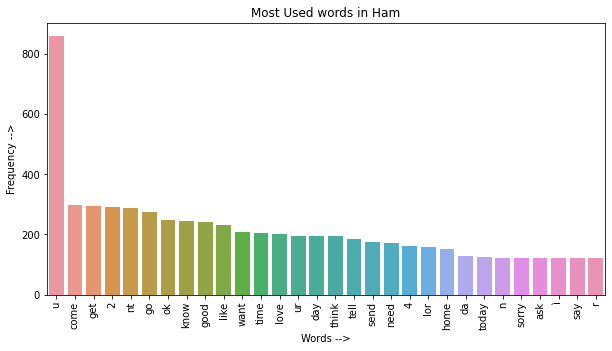

In [33]:
ham_corpus= []
for msg in df[df['target']== 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
plt.figure(figsize=(10,5))
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.xlabel("Words -->")
plt.ylabel("Frequency -->")
plt.title("Most Used words in Ham")

plt.show()

# Model Building

In [34]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
tf= TfidfVectorizer(max_features=3000)
X = tf.fit_transform(df['transformed_text']).toarray()

In [35]:
X.shape

(5169, 3000)

In [36]:
y = df['target'].values

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [38]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

              precision    recall  f1-score   support

         Ham       0.98      0.83      0.90       903
        Spam       0.44      0.89      0.59       131

    accuracy                           0.84      1034
   macro avg       0.71      0.86      0.75      1034
weighted avg       0.91      0.84      0.86      1034



<AxesSubplot:>

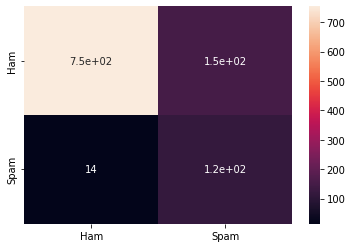

In [39]:
from sklearn.metrics import classification_report
gnb.fit(X_train,y_train)
y_pred_gnb = gnb.predict(X_test)
print(classification_report(y_test,y_pred_gnb,target_names=['Ham','Spam']))
sns.heatmap(confusion_matrix(y_test,y_pred_gnb),annot=True,xticklabels=['Ham','Spam'],yticklabels=['Ham','Spam'])


              precision    recall  f1-score   support

         Ham       0.98      1.00      0.99       903
        Spam       0.99      0.83      0.90       131

    accuracy                           0.98      1034
   macro avg       0.98      0.92      0.95      1034
weighted avg       0.98      0.98      0.98      1034



<AxesSubplot:>

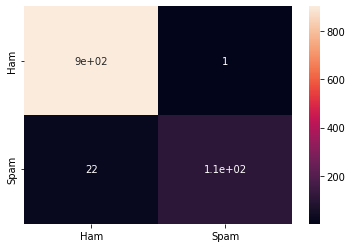

In [40]:
mnb.fit(X_train,y_train)
y_pred_mnb = mnb.predict(X_test)
print(classification_report(y_test,y_pred_mnb,target_names=['Ham','Spam']))
sns.heatmap(confusion_matrix(y_test,y_pred_mnb),annot=True,xticklabels=['Ham','Spam'],yticklabels=['Ham','Spam'])


              precision    recall  f1-score   support

         Ham       0.98      1.00      0.99       903
        Spam       0.98      0.89      0.93       131

    accuracy                           0.98      1034
   macro avg       0.98      0.94      0.96      1034
weighted avg       0.98      0.98      0.98      1034



<AxesSubplot:>

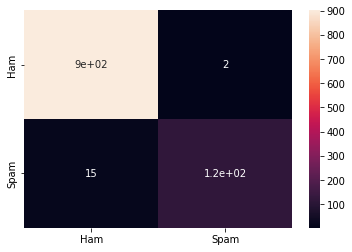

In [41]:
bnb.fit(X_train,y_train)
y_pred_bnb = bnb.predict(X_test)
print(classification_report(y_test,y_pred_bnb,target_names=['Ham','Spam']))
sns.heatmap(confusion_matrix(y_test,y_pred_bnb),annot=True,xticklabels=['Ham','Spam'],yticklabels=['Ham','Spam'])


### Choosing BNB and TFIDF

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [48]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)


In [49]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
}

In [45]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [50]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.97678916827853
Precision -  0.9819819819819819
For  KN
Accuracy -  0.9081237911025145
Precision -  1.0
For  NB
Accuracy -  0.9777562862669246
Precision -  0.990909090909091
For  DT
Accuracy -  0.9274661508704062
Precision -  0.8181818181818182
For  LR
Accuracy -  0.9535783365570599
Precision -  0.9368421052631579
For  RF
Accuracy -  0.9748549323017408
Precision -  0.9565217391304348
For  AdaBoost
Accuracy -  0.9642166344294004
Precision -  0.8790322580645161
For  BgC
Accuracy -  0.9642166344294004
Precision -  0.8790322580645161
For  ETC
Accuracy -  0.9796905222437138
Precision -  0.9508196721311475
For  GBDT
Accuracy -  0.9487427466150871
Precision -  0.975609756097561


In [51]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
temp_df


,Algorithm,Accuracy,Precision
1,KN,0.908124,1.000000
2,NB,0.977756,0.990909
0,SVC,0.976789,0.981982
9,GBDT,0.948743,0.975610
5,RF,0.974855,0.956522
8,ETC,0.979691,0.950820
4,LR,0.953578,0.936842
6,AdaBoost,0.964217,0.879032
7,BgC,0.964217,0.879032
3,DT,0.927466,0.818182


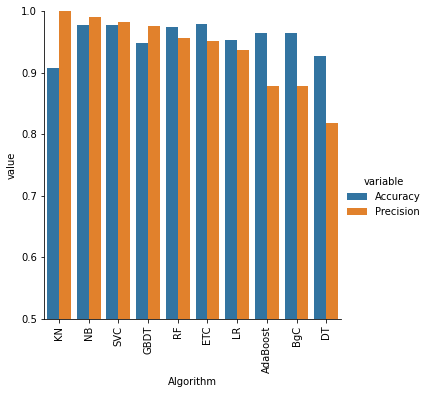

In [54]:
performance_df1 = pd.melt(temp_df, id_vars = "Algorithm")
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [55]:
mnb = MultinomialNB()
bnb= BernoulliNB()
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('mnb',mnb),('bnb',bnb)],voting='soft')
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('mnb', MultinomialNB()), ('bnb', BernoulliNB())],
                 voting='soft')

In [56]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9854932301740812
Precision 0.9915254237288136


In [57]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       903
           1       0.99      0.89      0.94       131

    accuracy                           0.99      1034
   macro avg       0.99      0.95      0.97      1034
weighted avg       0.99      0.99      0.99      1034



#### Will select Voting Classifier as the model.<br>
* Accuracy - 99%
* Precision - 99%